5.8. [Python] Let f:R→R be differentiable, x1∈R and consider the gradient descent xn+1=xn−ηf′(xn),to minimize f with the so-called learning rate η >0.  
(a) Take f to be a convex functionand show numerically (plots allowed) that for small η the iteration converges to the global minimum off.  
(b) Show that by increasing η the algorithm can converge faster.  
(c) However,taking η too large might lead to divergence.  
(d) Take f to be nonconvex and show that the algorithm can get stuck in a local minimum.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact,widgets

x=np.linspace(-100,100,10000)

y1=np.vectorize(lambda t:0.05*(t**2))
y1_derr=np.vectorize(lambda t:0.1*(t))

y2=np.vectorize(lambda t:10*np.sin(0.1*t+10))
y2_derr=np.vectorize(lambda t:np.cos(0.1*t+10))

y3=np.vectorize(lambda t:0.0001*(t**4)-0.2*(t**2)+0.001*(t**3))
y3_derr=np.vectorize(lambda t:0.0004*(t**3)-0.4*t+0.003*(t**2))

y=[y1]
y_derr=[y1_derr]
label='0.05*x^2'

n_slider=widgets.IntSlider(min=0, max=300, step=1, value=0)
niu_slider=widgets.FloatSlider(min=0, max=11, step=0.1, value=1)

x_n=[40]
def generate_sequence(niu):
    global x_n
    x_n=[40]
    for i in range(1,301):
        x_n.append(x_n[i-1]-niu*y_derr[0](x_n[i-1]))
    if n_slider.value==0:
        n_slider.value=1    
    n_slider.value=0

def set_function(x):
    global label
    label=x
    match x:
        case '0.05*x^2':
            y[0]=y1
            y_derr[0]=y1_derr
        case '10*sin(0.1*x+10)':
            y[0]=y2
            y_derr[0]=y2_derr
        case '0.0001x^4-0.001*x^3+*0.2*x^2':
            y[0]=y3
            y_derr[0]=y3_derr
    niu(niu_slider.value)
    n_slider.value=0


def plot_x(n):
    plt.style.use('_mpl-gallery')
    plt.figure(figsize=(15,15))
    

    plt.axis('square')
    plt.xticks([i for i in range(-100,101,10)])
    plt.yticks([i for i in range(-100,101,10)])
    plt.plot(x,y[0](x),label=label)
    plt.plot(x_n[n],y[0](x_n[n]),"ro",label="x_n")
    plt.legend()
    plt.show()



function=interact(set_function,x=widgets.RadioButtons(
    options=['0.05*x^2', '10*sin(0.1*x+10)', '0.0001x^4-0.001*x^3+*0.2*x^2'],
    value='0.05*x^2',
    description='Select Function:',
    disabled=False
))


niu=interact(generate_sequence,niu=niu_slider)
n=interact(plot_x,n=n_slider)



interactive(children=(RadioButtons(description='Select Function:', options=('0.05*x^2', '10*sin(0.1*x+10)', '0…

interactive(children=(FloatSlider(value=1.0, description='niu', max=11.0), Output()), _dom_classes=('widget-in…

interactive(children=(IntSlider(value=0, description='n', max=300), Output()), _dom_classes=('widget-interact'…

________________________________________________________________________________________________________________________________________________

4.5. [Python programming] Show numerically (plots allowed) that:\
\
$\sum_{n=1}^{\infty}{\frac{(-1)^{(n+1)}}{n}}$\
\
Illustrate computationally that changing the order of summation in this series can lead to a different sum.

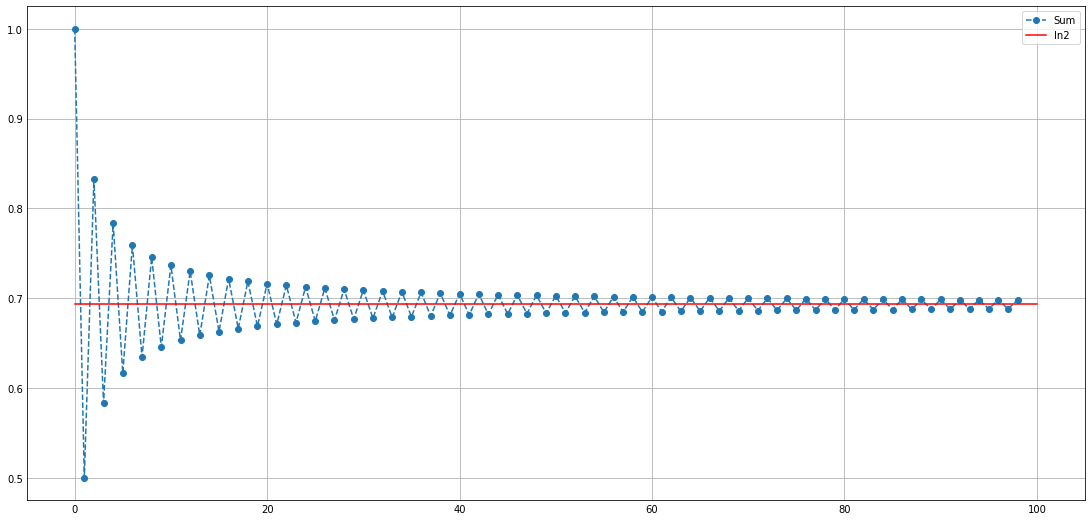

In [54]:
import matplotlib.pyplot as plt
import numpy as np

n=int(input("Enter a number: "))
plt.style.use('_mpl-gallery')
x_n=[((-1)**(i+1))/i for i in range(1,n)]
y_n=[sum(x_n[:i]) for i in range(1,n)]
x=np.linspace(0,n)
plt.figure(figsize=(15,7))
plt.plot(y_n,"--o",label="Sum")
plt.plot(x,np.log(2+x*0),label="ln2",color="red")
plt.legend()
plt.show()


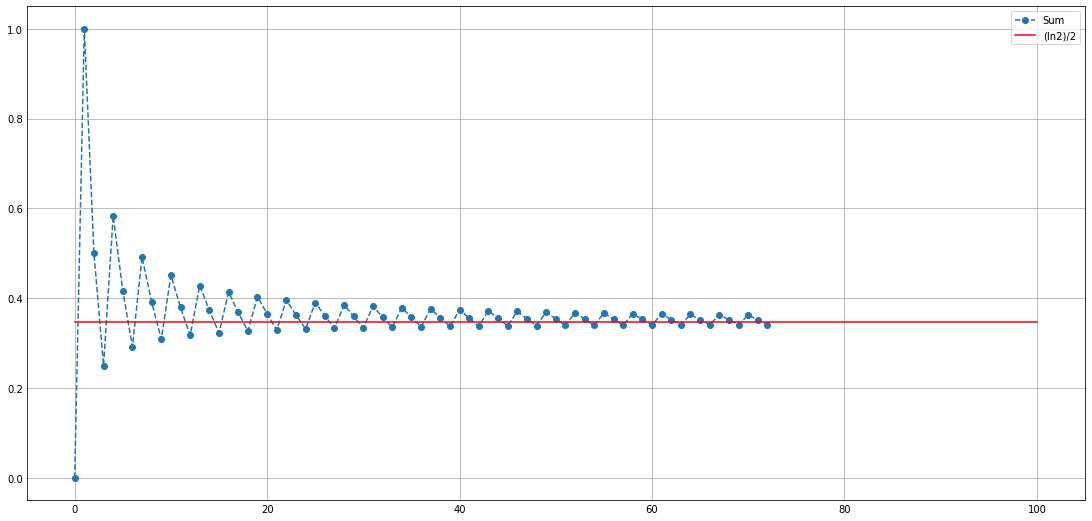

In [55]:
import matplotlib.pyplot as plt
import numpy as np

n=int(input("Enter a number: "))
plt.style.use('_mpl-gallery')
x_n=[((-1)**(i+1))/i for i in range(1,n)]
y_n=[0]
i=0
while i<n/2-2:
    y_n.append(y_n[-1]+x_n[i])
    y_n.append(y_n[-1]+x_n[2*i+1])
    y_n.append(y_n[-1]+x_n[2*i+3])
    i+=2

x=np.linspace(0,n)
plt.figure(figsize=(15,7))
plt.plot(y_n,"--o",label="Sum")
plt.plot(x,np.log(2+x*0)/2,label="(ln2)/2",color="red")
plt.legend()
plt.show()